In [1]:
import pandas as pd
import numpy as np
import torch 
%matplotlib inline
import math
import time
import torch.utils.data as Data
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
train=pd.read_feather('J:/quant_trade/trains.feather')
tlist=train.columns.tolist()
tlist=tlist[3:103]
x_train=train[tlist]
y_train=train['1W']

In [4]:
nows=pd.read_feather('J:/quant_trade/nows.feather')
tlist=nows.columns.tolist()
tlist=tlist[4:104]
x_nows=nows[tlist]
y_nows=nows['1W']
nows_xt=torch.from_numpy(x_nows.values.astype(np.float32)).cpu()
nows_yt=torch.from_numpy(y_nows.values.astype(np.float32)).cpu()

In [5]:
test=pd.read_feather('J:/quant_trade/database/tests.feather')
tlist=test.columns.tolist()
tlist=tlist[3:103]
x_test=test[tlist]
y_test=test['1W']

In [6]:
test_xt=torch.from_numpy(x_test.values.astype(np.float32)).cpu()
test_yt=torch.from_numpy(y_test.values.astype(np.float32)).cpu()

In [7]:
train=None
test=None

In [13]:
class MLPrg(nn.Module):
    def __init__(self):
        super(MLPrg,self).__init__()
        self.hidden1=nn.Linear(in_features=100,out_features=512,bias=True)
        self.hidden2=nn.Linear(in_features=512,out_features=256)
        self.hidden3=nn.Linear(in_features=256,out_features=64)
        self.predict=nn.Linear(64,1)
        self.drop=nn.Dropout(0.2)
    def forward(self,x):
        x=F.tanh(self.hidden1(x))
        x=self.drop(x)
        x=F.tanh(self.hidden2(x))
        x=self.drop(x)
        x=F.tanh(self.hidden3(x))
        x=self.drop(x)
        output=self.predict(x)
        return output[:,0]
if __name__ == '__main__':
    # Main
    rg = torch.load('J:/quant_trade/modelbase/99.pt').cpu()
    print(rg)

MLPrg(
  (hidden1): Linear(in_features=100, out_features=512, bias=True)
  (hidden2): Linear(in_features=512, out_features=256, bias=True)
  (hidden3): Linear(in_features=256, out_features=64, bias=True)
  (predict): Linear(in_features=64, out_features=1, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
)


In [16]:
testy=rg(test_xt)
testy=testy.cpu()
mae=mean_absolute_error(test_yt.detach().numpy(),testy.detach().numpy())
df=pd.DataFrame()
df['real']=test_yt
df['pre']=testy.detach().numpy()
idx=scipy.stats.ks_2samp(df['pre'],df['real'])
ks=scipy.stats.ks_2samp(df['pre'],df['real'])[0]
index=np.argsort(test_yt)

In [17]:
r2_score(df['real'],df['pre'])

-0.002482713817998583

In [13]:
df.to_feather('now.feather')

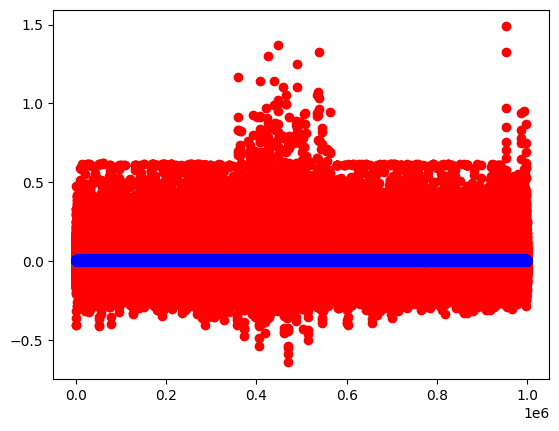

In [18]:
plt.scatter(y=df['real'],x=range(df.shape[0]),color='red')
plt.scatter(y=df['pre'],x=range(df.shape[0]),color='blue')
plt.show()
plt.close()

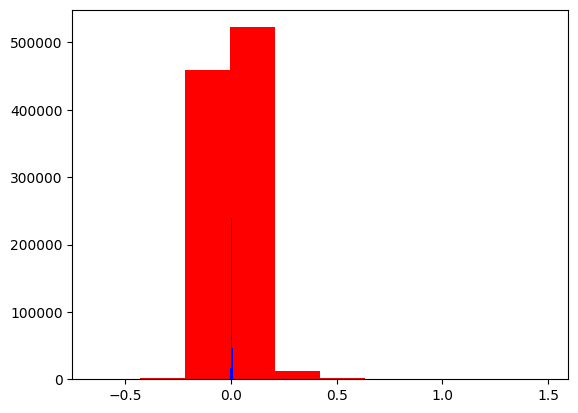

In [19]:
plt.hist(df['real'],color='red')
plt.hist(df['pre'],color='blue')
plt.show()
plt.close()

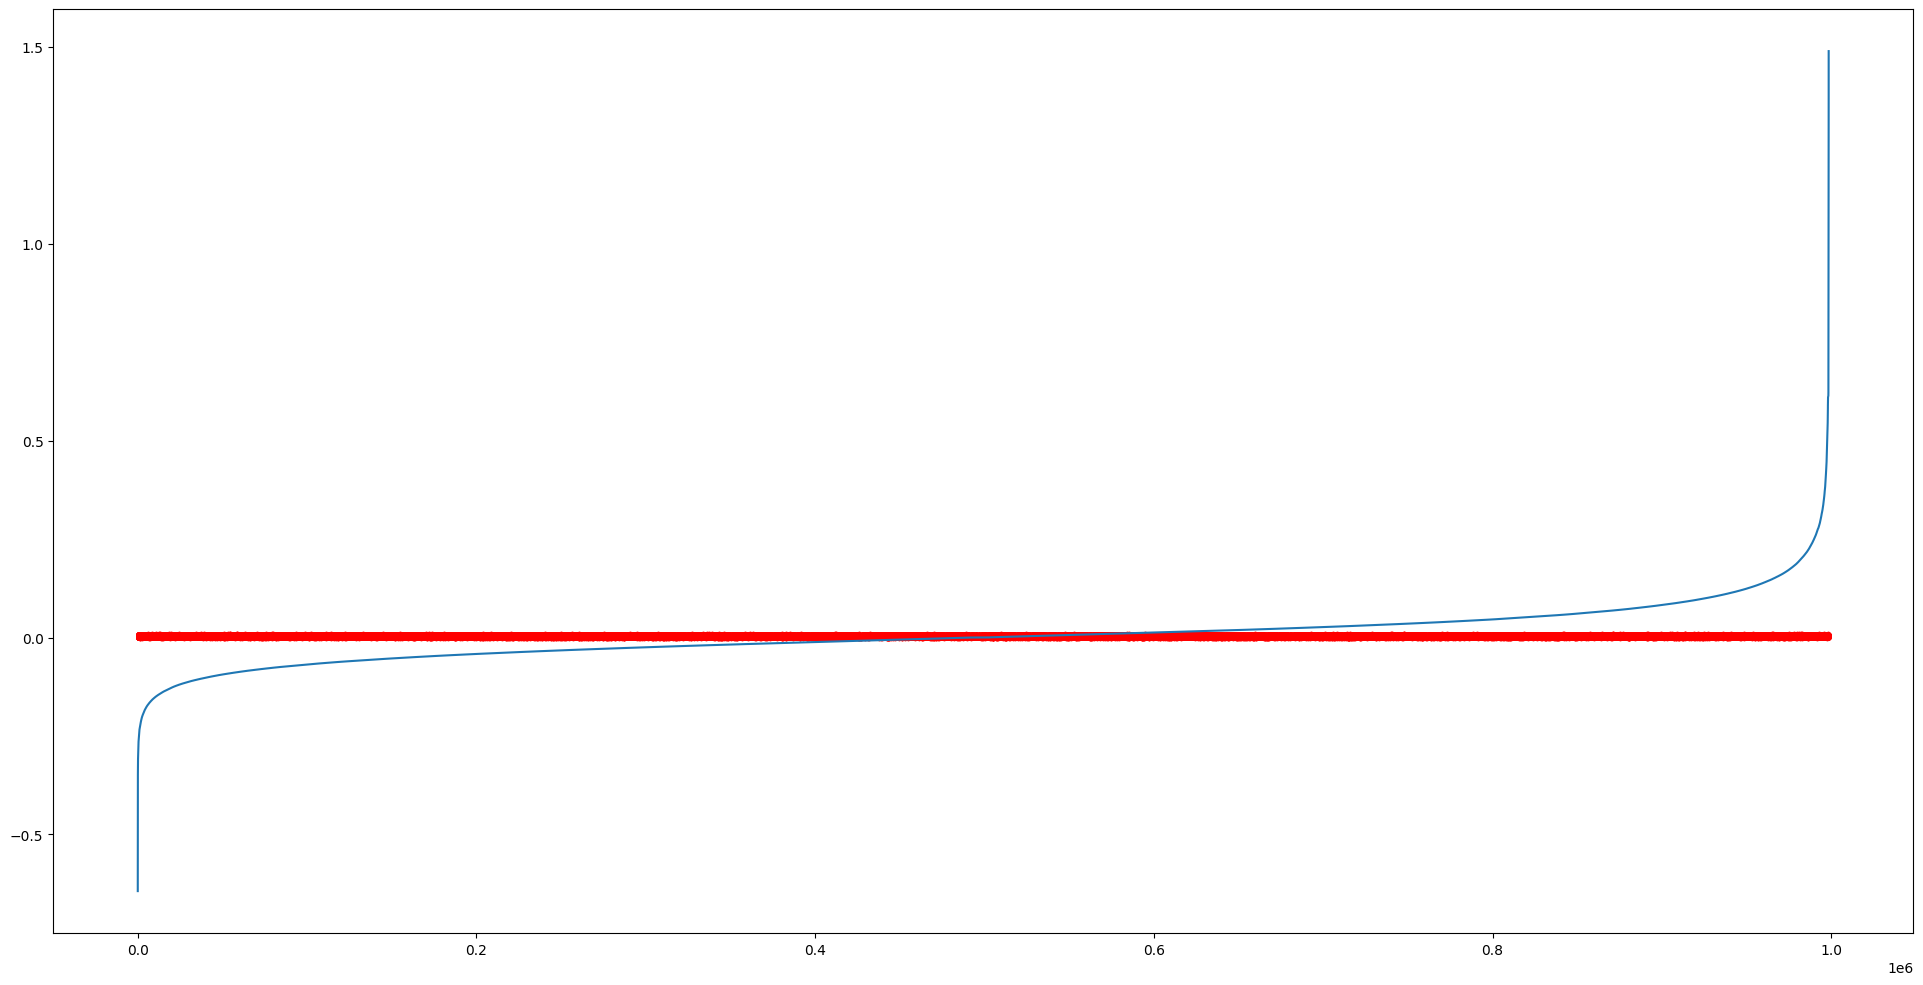

In [20]:

plt.figure(figsize=(24,12))
plt.plot(np.arange(len(test_yt)),test_yt[index])
plt.scatter(x=np.arange(len(testy.detach().numpy())),y=testy.detach().numpy()[index],c='red',s=3)

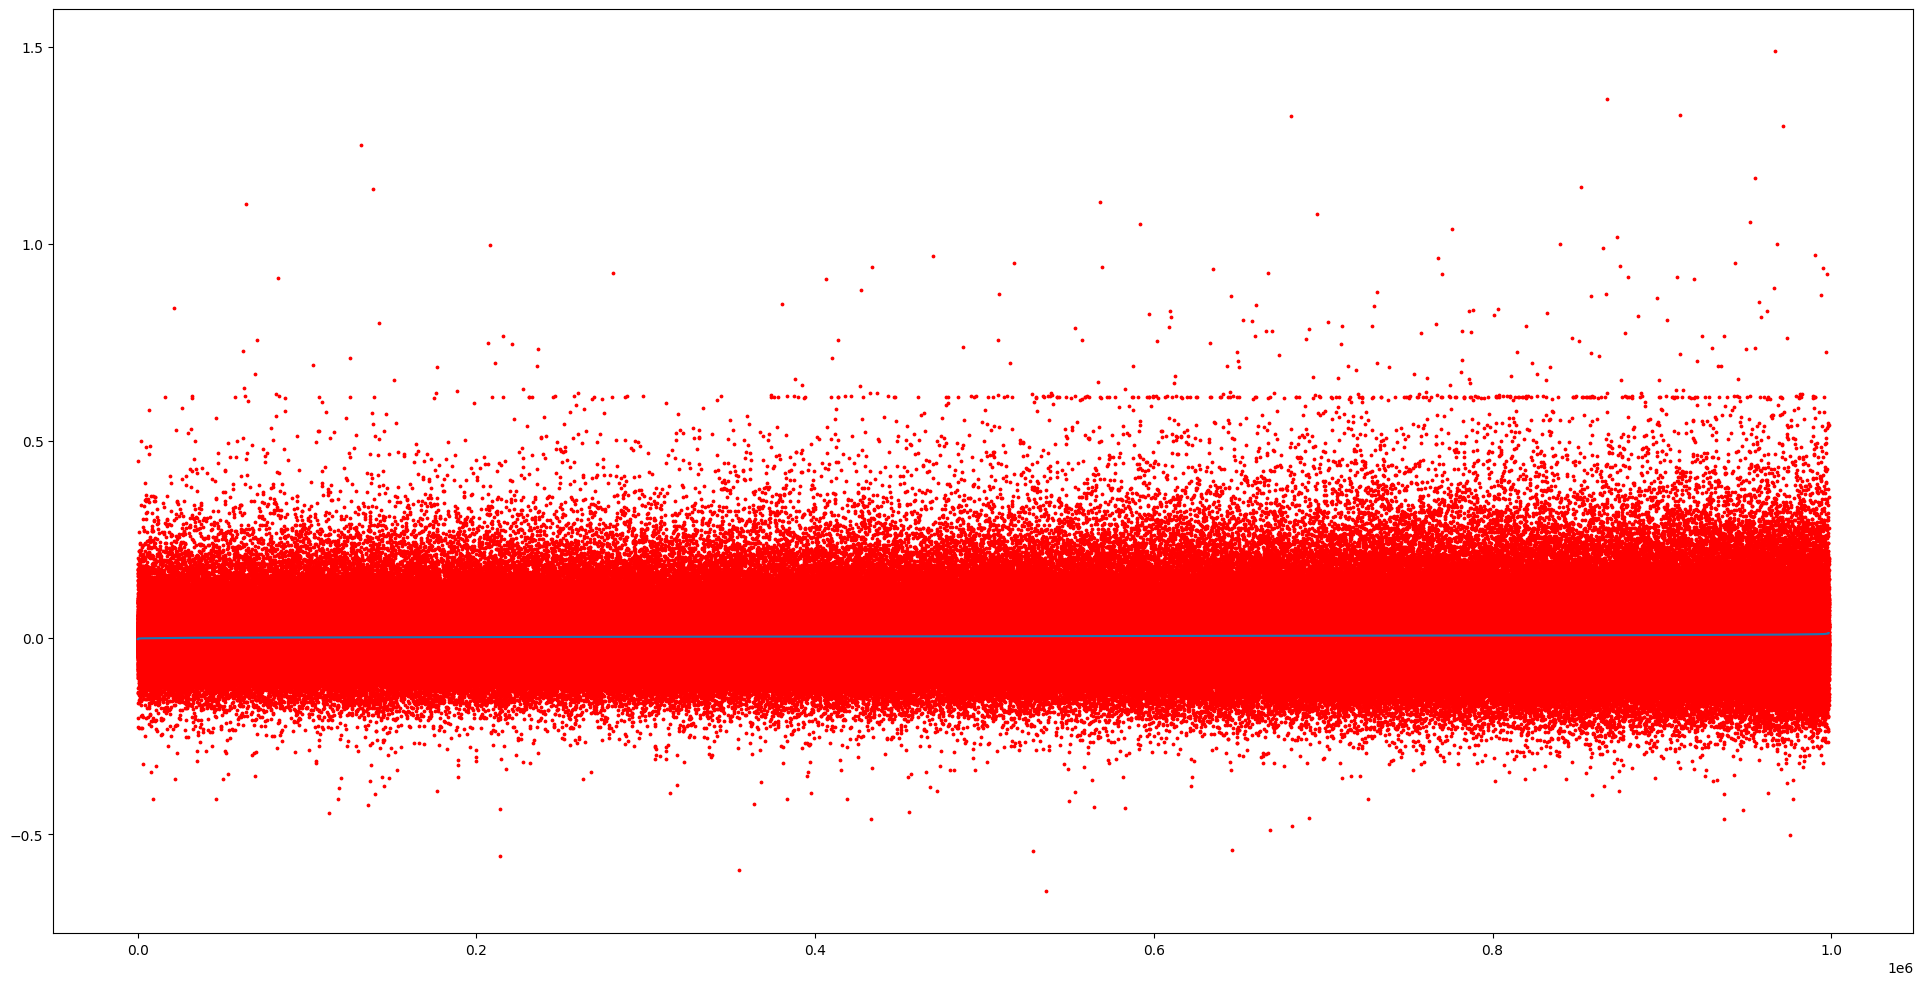

In [21]:
index=np.argsort(testy.detach().numpy())
plt.figure(figsize=(24,12))
plt.plot(np.arange(len(testy.detach().numpy())),testy.detach().numpy()[index])
plt.scatter(x=np.arange(len(test_yt)),y=test_yt[index],c='red',s=3)

In [10]:
ks

0.025841597149121265

In [22]:
df.describe()

,real,pre
count,998429.000000,998429.000000
mean,0.005463,0.003250
std,0.070965,0.002211
min,-0.643727,-0.004135
25%,-0.032663,0.001585
50%,0.000000,0.003195
75%,0.035000,0.004908
max,1.488540,0.011471


In [12]:
for name, param in rg.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]}\n")

Layer: hidden1.weight | Size: torch.Size([512, 100]) | Values: tensor([[-22.7163,  -3.6420,   9.3939,   5.4206,  11.8186,  16.1619,  -2.8561,
          -7.0616, -11.3902, -10.5839,   1.6668,   9.7340,  18.2040,  14.3126,
          -1.9517,  -4.3189,  -0.8375,   3.4215,  -2.4724,  10.5679,   7.7117,
           2.5658,   4.9133,   6.3525,   7.2049,  -1.4418,  11.1186,  28.1527,
          37.9558,  34.1469,  34.2343,  23.5280,  17.6167,  22.0435,  29.8249,
          17.8285,  30.4384,  33.7376,  50.5440,  49.4649,  30.6048,  36.8595,
          41.0840,  52.3792,  34.2095,  14.9383,  16.4915,  25.1426,  21.1239,
          26.5334,  24.6512,  23.2276,  17.5470,  12.7515,  18.3916,  32.8526,
          41.9654,  41.6611,  39.1693,  33.5851,  23.7434,  26.0300,  24.3192,
          33.6807,  21.5763,  33.0564,  13.0180,  15.4326,  29.6861,  28.9466,
          20.5362,  19.5207,  28.5120,  26.0937,  16.8084,  17.3889,  19.5432,
           5.2316,   9.0170,  19.2685,  17.0093,   8.4108,  11.0083,

In [17]:
scipy.stats.ks_2samp(df['pre']-0.00001,df['real'])

KstestResult(statistic=0.025848608163424713, pvalue=3.4095789520744973e-290, statistic_location=0.11764292, statistic_sign=1)

In [5]:
nn.KLDivLoss()

KLDivLoss()